In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

#read_data

In [2]:
df=pd.read_csv("gold.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
5774,2022-07-21,1693.70,1719.50,1678.4,1713.40,0,USD
5775,2022-07-22,1717.20,1738.30,1711.7,1727.40,0,USD
5776,2022-07-24,1724.35,1725.05,1722.3,1722.55,0,USD
5777,2022-07-25,1726.30,1734.60,1712.9,1719.10,0,USD
5778,2022-07-26,1719.65,1726.30,1718.9,1722.25,0,USD


#describe_data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5779 non-null   object 
 1   Open      5779 non-null   float64
 2   High      5779 non-null   float64
 3   Low       5779 non-null   float64
 4   Close     5779 non-null   float64
 5   Volume    5779 non-null   int64  
 6   Currency  5779 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 316.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000
mean,1044.551120,1050.428815,1038.251678,1048.109945,32033.913480
std,517.307125,520.858833,513.308391,519.782523,89350.399794
min,255.000000,255.000000,255.000000,255.100000,0.000000
25%,468.600000,469.500000,468.050000,468.600000,17.000000
50%,1194.500000,1201.000000,1186.300000,1197.200000,177.000000
75%,1379.950000,1389.900000,1370.950000,1398.750000,1289.000000
max,2062.400000,2085.200000,2033.600000,2054.600000,816531.000000


In [7]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999892,0.999844,0.998985,0.242495
High,0.999892,1.000000,0.999787,0.999061,0.243857
Low,0.999844,0.999787,1.000000,0.999128,0.240475
Close,0.998985,0.999061,0.999128,1.000000,0.239310
Volume,0.242495,0.243857,0.240475,0.239310,1.000000


In [8]:
df.count()

Date        5779
Open        5779
High        5779
Low         5779
Close       5779
Volume      5779
Currency    5779
dtype: int64

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=5779, step=1)

In [11]:
df.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [12]:
df.cov()

,Open,High,Low,Close,Volume
Open,2.676067e+05,2.694148e+05,2.654966e+05,2.686144e+05,1.120850e+07
High,2.694148e+05,2.712939e+05,2.673041e+05,2.704791e+05,1.134884e+07
Low,2.654966e+05,2.673041e+05,2.634855e+05,2.665761e+05,1.102920e+07
Close,2.686144e+05,2.704791e+05,2.665761e+05,2.701739e+05,1.111420e+07
Volume,1.120850e+07,1.134884e+07,1.102920e+07,1.111420e+07,7.983494e+09


In [13]:
df.items

<bound method DataFrame.items of             Date     Open     High     Low    Close  Volume Currency
0     2000-01-04   281.00   281.00   281.0   282.70       4      USD
1     2000-01-05   283.20   283.20   283.2   281.10      16      USD
2     2000-01-06   281.40   281.40   281.4   281.40       0      USD
3     2000-01-07   281.90   281.90   281.9   281.90       0      USD
4     2000-01-10   281.70   281.70   281.7   281.70       0      USD
...          ...      ...      ...     ...      ...     ...      ...
5774  2022-07-21  1693.70  1719.50  1678.4  1713.40       0      USD
5775  2022-07-22  1717.20  1738.30  1711.7  1727.40       0      USD
5776  2022-07-24  1724.35  1725.05  1722.3  1722.55       0      USD
5777  2022-07-25  1726.30  1734.60  1712.9  1719.10       0      USD
5778  2022-07-26  1719.65  1726.30  1718.9  1722.25       0      USD

[5779 rows x 7 columns]>

#preprocessing

In [14]:
mask=df.isna().any(axis=0)
mask.sum()

0

In [15]:
mask1=df.isna().any(axis=1)
mask1.sum()

0

In [16]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)

Open
High
Low
Close


In [19]:
q1 = df[col_name].quantile(0.25)
q1    

468.6

In [20]:
q3 = df[col_name].quantile(0.75)
q3

1398.75

In [21]:
iqr = q3 - q1
iqr

930.15

In [22]:
low = q1-1.5*iqr
low

-926.6249999999999

In [23]:
high = q3+1.5*iqr
high

2793.975

In [24]:
print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Outliers =  Series([], Name: Close, dtype: float64)


<AxesSubplot:ylabel='Close'>

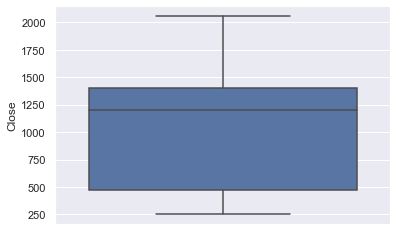

In [25]:
sns.boxplot(y="Close",data=df)

In [26]:
 print("Exclude the Outliers = ",df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name])
df[col_name] = df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]

Exclude the Outliers =  0        282.70
1        281.10
2        281.40
3        281.90
4        281.70
         ...   
5774    1713.40
5775    1727.40
5776    1722.55
5777    1719.10
5778    1722.25
Name: Close, Length: 5779, dtype: float64


In [27]:
print("Change the outliers with median ",df[col_name].median())
df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()
    

Change the outliers with median  1197.2


<AxesSubplot:ylabel='Close'>

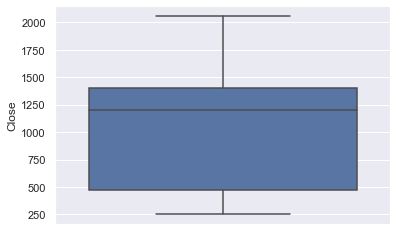

In [28]:
sns.boxplot(y="Close",data=df)

#analysis

In [29]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [30]:
df.groupby("Date").max()["High"]

Date
2000-01-04     281.00
2000-01-05     283.20
2000-01-06     281.40
2000-01-07     281.90
2000-01-10     281.70
               ...   
2022-07-21    1719.50
2022-07-22    1738.30
2022-07-24    1725.05
2022-07-25    1734.60
2022-07-26    1726.30
Name: High, Length: 5779, dtype: float64

In [31]:
df.groupby("Low").min()["Date"]

Low
255.0     2001-02-16
255.5     2001-04-03
255.6     2001-02-15
256.5     2001-04-11
256.6     2001-02-21
             ...    
1998.6    2022-03-08
2011.0    2020-08-07
2011.2    2020-08-05
2015.7    2020-08-10
2033.6    2020-08-06
Name: Date, Length: 4377, dtype: object

In [32]:
df.groupby("Low").max()["Date"]

Low
255.0     2001-04-02
255.5     2001-04-03
255.6     2001-02-15
256.5     2001-04-11
256.6     2001-04-10
             ...    
1998.6    2022-03-08
2011.0    2020-08-07
2011.2    2020-08-05
2015.7    2020-08-10
2033.6    2020-08-06
Name: Date, Length: 4377, dtype: object

In [33]:
df.groupby("Volume").min()["Date"]

Volume
0         2000-01-06
1         2000-01-24
2         2000-02-18
3         2000-10-13
4         2000-01-04
             ...    
659625    2020-03-06
674982    2019-11-07
745843    2020-02-28
813406    2020-01-08
816531    2016-11-09
Name: Date, Length: 2298, dtype: object

In [34]:
df.groupby("Volume").max()["Date"]

Volume
0         2022-07-26
1         2021-07-27
2         2021-09-02
3         2021-07-20
4         2021-08-27
             ...    
659625    2020-03-06
674982    2019-11-07
745843    2020-02-28
813406    2020-01-08
816531    2016-11-09
Name: Date, Length: 2298, dtype: object

In [35]:
df["High"].max()

2085.2

In [36]:
df["High"].min()

255.0

In [37]:
df["High"].mean()

1050.4288146738197

In [38]:
df["Low"].max()

2033.6

In [39]:
df["Low"].min()

255.0

In [40]:
df["Low"].mean()

1038.251678491087

In [41]:
df["Volume"].max()

816531

In [42]:
df["Volume"].min()

0

In [43]:
df["Volume"].mean()

32033.9134798408

In [44]:
df["Volume"].std()

89350.39979368441